balance用了Biasing the Algorithm的方法

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Copy of final_IMA2.csv")
df.head()

,order_id,seller_rating,product_rating,Order_dispatch_time,Order_delivery_time,Lead_time,Aggregate_freight_value,payment_value,review_class
0,00010242fe8c5a6d1ba2dd792cb16214,3.906040,3.666667,6,7,8,13.29,72.19,1
1,bd31b009e1dbc47fc7c250b1e2cf5440,3.755303,3.166667,0,14,12,22.95,75.85,0
2,bb4eb0196897c20281a61f75ce23211c,3.755303,4.500000,2,10,11,15.42,111.42,1
3,f9847bf9cc7336c6ba07fe2bdbb6cae1,3.812658,3.921053,0,12,12,13.30,139.20,1
4,5c94ad4e194c0e6794688a9d2b9ea94b,4.077586,4.462121,1,31,-11,18.23,48.13,0


In [ ]:
# min-max normalisation (feature scaling)
df["seller_rating"] = (df["seller_rating"] - df["seller_rating"].min()) / (df["seller_rating"].max() -df["seller_rating"].min())
df["product_rating"] = (df["product_rating"] - df["product_rating"].min()) / (df["product_rating"].max() -df["product_rating"].min())
df["Order_dispatch_time"] = (df["Order_dispatch_time"] - df["Order_dispatch_time"].min()) / (df["Order_dispatch_time"].max() -df["Order_dispatch_time"].min())
df["Order_delivery_time"] = (df["Order_delivery_time"] - df["Order_delivery_time"].min()) / (df["Order_delivery_time"].max() -df["Order_delivery_time"].min())
df["Lead_time"] = (df["Lead_time"] - df["Lead_time"].min()) / (df["Lead_time"].max() -df["Lead_time"].min())
df["Aggregate_freight_value"] = (df["Aggregate_freight_value"] - df["Aggregate_freight_value"].min()) / (df["Aggregate_freight_value"].max() -df["Aggregate_freight_value"].min())
df["payment_value"] = (df["payment_value"] - df["payment_value"].min()) / (df["payment_value"].max() -df["payment_value"].min())

In [ ]:
df.head()

,order_id,seller_rating,product_rating,Order_dispatch_time,Order_delivery_time,Lead_time,Aggregate_freight_value,payment_value,review_class
0,00010242fe8c5a6d1ba2dd792cb16214,0.726510,0.666667,0.637993,0.033493,0.588060,0.007404,0.004585,1
1,bd31b009e1dbc47fc7c250b1e2cf5440,0.688826,0.541667,0.616487,0.066986,0.600000,0.012786,0.004853,0
2,bb4eb0196897c20281a61f75ce23211c,0.688826,0.875000,0.623656,0.047847,0.597015,0.008591,0.007458,1
3,f9847bf9cc7336c6ba07fe2bdbb6cae1,0.703165,0.730263,0.616487,0.057416,0.600000,0.007410,0.009492,1
4,5c94ad4e194c0e6794688a9d2b9ea94b,0.769397,0.865530,0.620072,0.148325,0.531343,0.010156,0.002823,0


In [ ]:
df.head()
df.shape

(102228, 9)

SVM

In [ ]:
X = df.iloc[:,1:8]
Y= df.iloc[:,-1]

In [ ]:
X.head()

,seller_rating,product_rating,Order_dispatch_time,Order_delivery_time,Lead_time,Aggregate_freight_value,payment_value,review_class
0,0.726510,0.666667,0.637993,0.033493,0.588060,0.007404,0.004585,1
1,0.688826,0.541667,0.616487,0.066986,0.600000,0.012786,0.004853,0
2,0.688826,0.875000,0.623656,0.047847,0.597015,0.008591,0.007458,1
3,0.703165,0.730263,0.616487,0.057416,0.600000,0.007410,0.009492,1
4,0.769397,0.865530,0.620072,0.148325,0.531343,0.010156,0.002823,0


In [ ]:
Y.head()

0    1
1    0
2    1
3    1
4    0
Name: review_class, dtype: int64

In [ ]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(81782, 8)
(20446, 8)
(81782,)
(20446,)


In [ ]:
from sklearn.svm import SVC
clf = SVC(class_weight='balanced')
clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, predictions)
print("Precision:", precision)
recall = recall_score(Y_test, predictions)
print("Recall:", recall)
F1_score = 2 * (precision * recall) / (precision + recall)
print("F1_score:", F1_score)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0


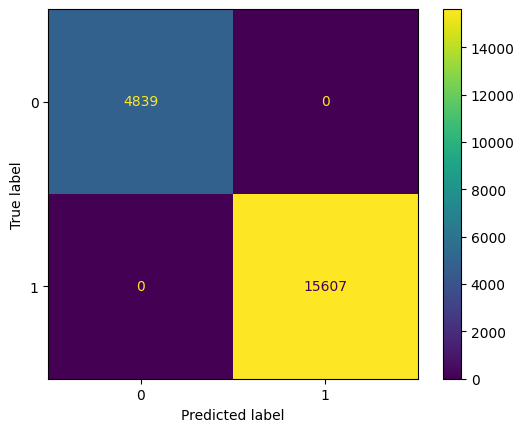

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# build a confusion matrix
cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)

disp.plot()
plt.show()